<a href="https://colab.research.google.com/github/mlister3/Analysis-Crowdfunding-Excel-Workbook/blob/main/Rough_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Import Dependencies

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import os
import warnings
warnings.filterwarnings("ignore")
from google.colab import files
import requests

In [4]:
def get_excel(debug_mode):
    while True:
        try:
            # Upload excel
            excel_in = files.upload()

            if not excel_in:
                print("No file selected.")
                continue

            file_name = next(iter(excel_in))
            return file_name  # Return the DataFrame and exit the function
        except pd.errors.ParserError:
            if debug_mode == 1:
                print("Error parsing the Excel file. Please make sure it is a valid Excel file.")
        except Exception as e:
            if debug_mode == 1:
                print(f"An error occurred: {e}")

In [5]:
def create_clean_df(init_df, debug_mode):
    # Flip axis
    init_df = init_df.transpose()
    if debug_mode == 1:
        print("Transposed DF")

    # Clean up row and column titles
    init_df.columns = init_df.iloc[0]
    init_df = init_df.drop(init_df.index[0])
    init_df.index.name = 'Years'
    init_df.columns.name = None
    init_df.reset_index(inplace=True)
    init_df.set_index('Years', inplace=True)
    if debug_mode == 1:
        print("Corrected index")

    # Remove excel junk
    init_df = init_df.replace({'#DIV/0!': ''})
    init_df = init_df.fillna('')
    init_df.columns = init_df.columns.fillna('')
    init_df.replace({0.0: ''}, inplace=True)
    if debug_mode == 1:
        print("Removed NULL, #DIV/0!, and 0.0 values")

    # Drop last row that passes the final year index
    init_df = init_df.iloc[:-1]
    if debug_mode == 1:
        print(init_df.columns)

    # Only keep working columns
    active_columns = ['Total Tuition', 'O & M ', 'Cost Pool', 'Cost Pool/Tuition',
                      'Cost Pool/(Tuition + OM)', 'Cost Pool/(Tuition + OM) 3yr avg. ',
                      'Total Rochester Center for Innovation (BSHS&BSHP) Students   ',
                      'Total Students Served on the UMR Campus', 'Total UMR Employees',
                      'Per students served', 'Consumer Price Index ']
    init_df = init_df[active_columns]

    # Clean values and format columns into percentages as needed
    init_df[['Cost Pool/Tuition', 'Cost Pool/(Tuition + OM)', 'Cost Pool/(Tuition + OM) 3yr avg. ']] = init_df[
    ['Cost Pool/Tuition', 'Cost Pool/(Tuition + OM)', 'Cost Pool/(Tuition + OM) 3yr avg. ']].applymap(lambda x: '{:.2%}'.format(x) if isinstance(x, (float, int)) else x)

    init_df.data = init_df.applymap(lambda x: int(x) if x != '' and '%' not in str(x) else x)
    init_df = init_df.applymap(lambda x: round(float(x), 2) if x != '' and '%' not in str(x) else x)

    if debug_mode == 1:
        print("Values formatted for view")
    return init_df

# Investment Request for UMR Expansion

In [6]:
# Set debug_mode to 0 if you want to disable debugging
debug_mode = 0
# Upload Excel file
init_excel = get_excel(debug_mode)

Saving Cost Pool and O&M Historical  (1).xlsx to Cost Pool and O&M Historical  (1).xlsx


In [7]:
init_df = pd.read_excel(init_excel, skiprows=1)
init_df = create_clean_df(init_df, debug_mode)

<ipython-input-5-c5f463a5ddd1>:42: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  init_df.data = init_df.applymap(lambda x: int(x) if x != '' and '%' not in str(x) else x)


In [11]:
init_df.head(10)

,Total Tuition,O & M,Cost Pool,Cost Pool/Tuition,Cost Pool/(Tuition + OM),Cost Pool/(Tuition + OM) 3yr avg.,Total Rochester Center for Innovation (BSHS&BSHP) Students,Total Students Served on the UMR Campus,Total UMR Employees,Per students served,Consumer Price Index
Years,,,,,,,,,,,
2009,666000.0,7858000.0,149000.0,22.37%,1.66%,,,,52.0,,644.7
2010,1249000.0,7511000.0,169000.0,13.53%,1.83%,,,,69.0,,655.3
2011,2265000.0,7369000.0,405000.0,17.88%,4.02%,2.69%,257.0,,83.0,,676.0
2012,3907000.0,6978000.0,733000.0,18.76%,6.47%,4.46%,385.0,,99.0,,689.9
2013,5370000.0,6978000.0,1252000.0,23.31%,9.78%,7.27%,477.0,,104.0,,700.0
2014,6469000.0,7147000.0,1798000.0,27.79%,12.78%,10.27%,479.0,,100.0,,711.4
2015,6374000.0,7384000.0,2303000.0,36.13%,16.21%,13.48%,402.0,,94.0,,712.3
2016,5400000.0,7464000.0,2417000.0,44.76%,18.15%,16.20%,424.0,,90.0,,721.2
2017,5515000.0,7834000.0,2206000.0,40.00%,15.99%,17.33%,459.0,,88.0,,736.6


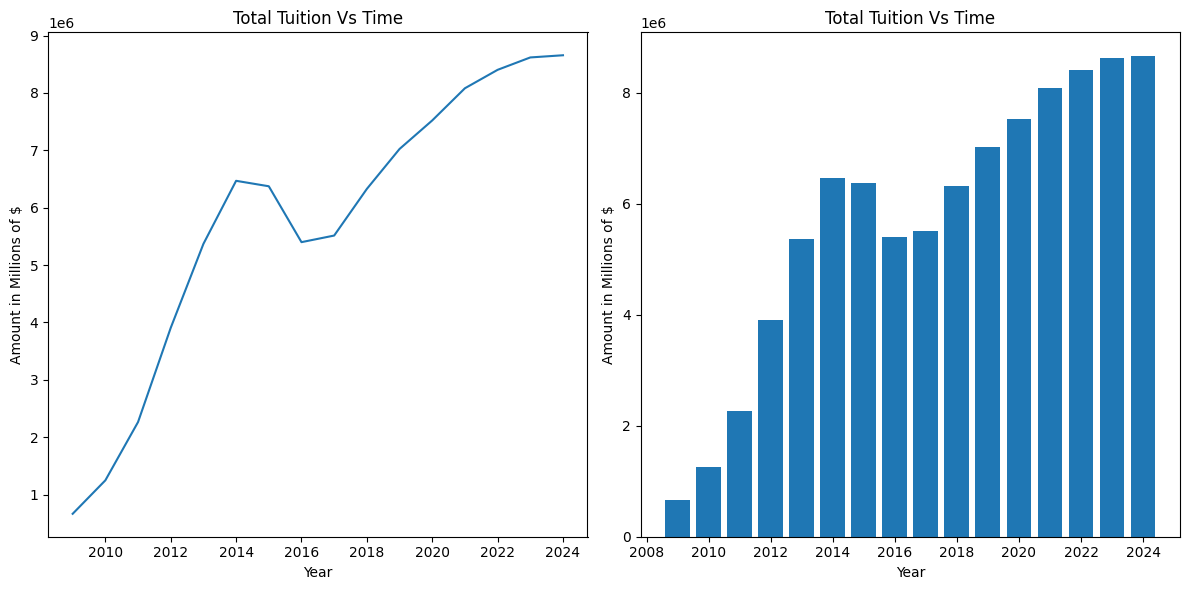

In [8]:
# Create a figure and two subplots (Total Tuition Vs Time)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot Total Tuition over time (Line)
axs[0].plot(init_df.index, init_df['Total Tuition'])
# Add labels to the x and y axes
axs[0].set_title("Total Tuition Vs Time")
axs[0].set_xlabel("Year")
axs[0].set_ylabel("Amount in Millions of $")

# Plot Total Tuition over time (Bar)
axs[1].bar(init_df.index, init_df['Total Tuition'])
# Add labels to the x and y axes
axs[1].set_title("Total Tuition Vs Time")
axs[1].set_xlabel("Year")
axs[1].set_ylabel("Amount in Millions of $")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

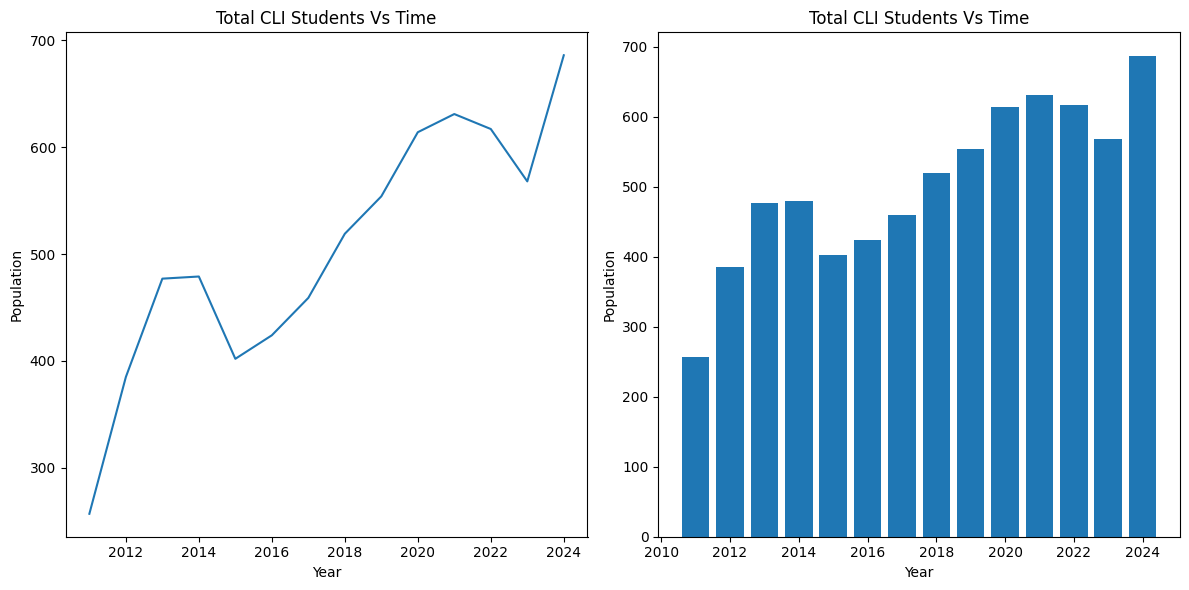

In [12]:
# Create a figure and two subplots (CLI Student Pop Vs Time)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

cli_stu = init_df['Total Rochester Center for Innovation (BSHS&BSHP) Students   '].apply(lambda x: int(x) if x != '' else None)
cli_stu.dropna(inplace=True)

# Plot CLI Student Pop Vs Time (Line)
axs[0].plot(cli_stu.index, cli_stu)
# Add labels to the x and y axes
axs[0].set_title("Total CLI Students Vs Time")
axs[0].set_xlabel("Year")
axs[0].set_ylabel("Population")

# Plot CLI Student Pop Vs Time (Bar)
axs[1].bar(cli_stu.index, cli_stu)
# Add labels to the x and y axes
axs[1].set_title("Total CLI Students Vs Time")
axs[1].set_xlabel("Year")
axs[1].set_ylabel("Population")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

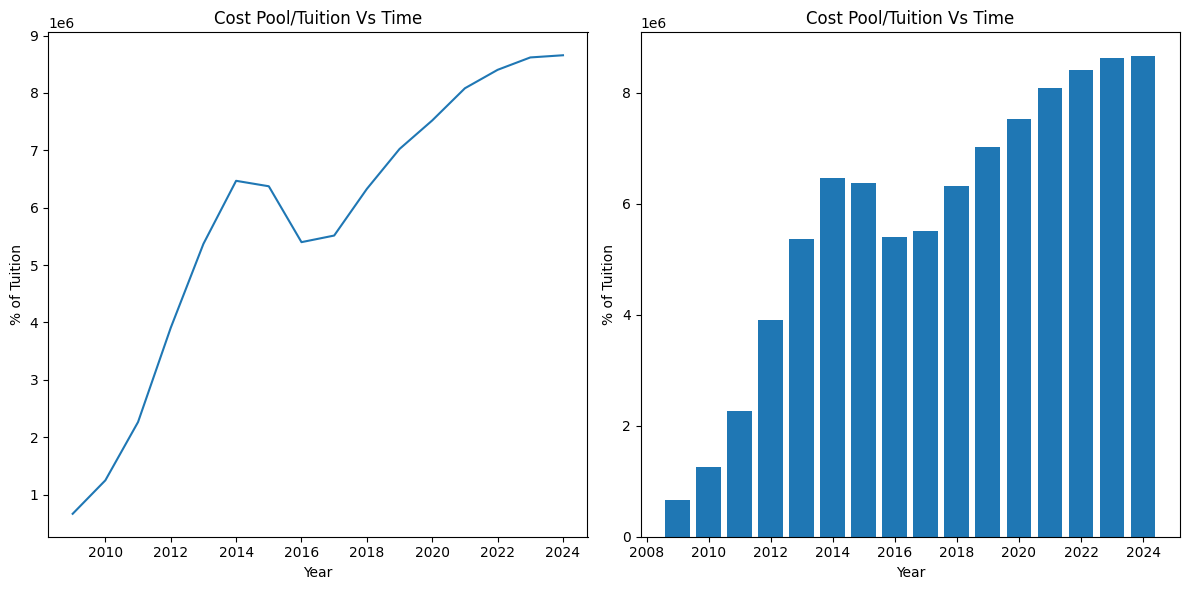

In [14]:
# Create a figure and two subplots (Cost Pool/Tuition Vs Time)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot Cost Pool/Tuition Vs Time (Line)
axs[0].plot(init_df.index, init_df['Total Tuition'])
# Add labels to the x and y axes
axs[0].set_title("Cost Pool/Tuition Vs Time")
axs[0].set_xlabel("Year")
axs[0].set_ylabel("% of Tuition")

# Plot Cost Pool/Tuition Vs Time (Bar)
axs[1].bar(init_df.index, init_df['Total Tuition'])
# Add labels to the x and y axes
axs[1].set_title("Cost Pool/Tuition Vs Time")
axs[1].set_xlabel("Year")
axs[1].set_ylabel("% of Tuition")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()